In [122]:
#!pip install -U scikit-learn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
df=pd.read_csv('datasetsdiabetes.csv')

In [124]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Data insights**

In [125]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4b9d7a5c0>,
      dtype=object)

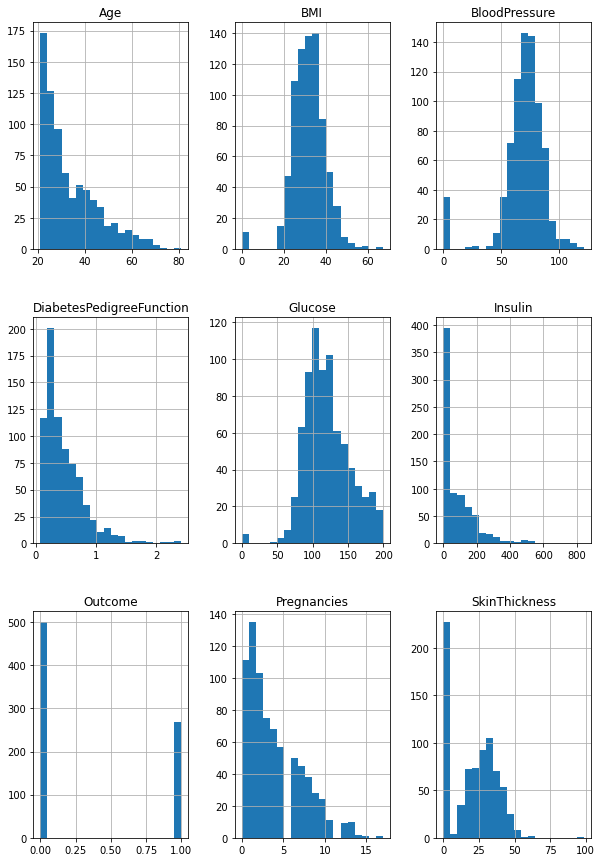

In [126]:
df.hist(bins=20,figsize=(10,15))

# **Finding outliers using boxplots. Categorized by outcome. **

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


Age                              AxesSubplot(0.1,0.559091;0.173913x0.340909)
BMI                         AxesSubplot(0.308696,0.559091;0.173913x0.340909)
BloodPressure               AxesSubplot(0.517391,0.559091;0.173913x0.340909)
DiabetesPedigreeFunction    AxesSubplot(0.726087,0.559091;0.173913x0.340909)
Glucose                              AxesSubplot(0.1,0.15;0.173913x0.340909)
Insulin                         AxesSubplot(0.308696,0.15;0.173913x0.340909)
Pregnancies                     AxesSubplot(0.517391,0.15;0.173913x0.340909)
SkinThickness                   AxesSubplot(0.726087,0.15;0.173913x0.340909)
dtype: object

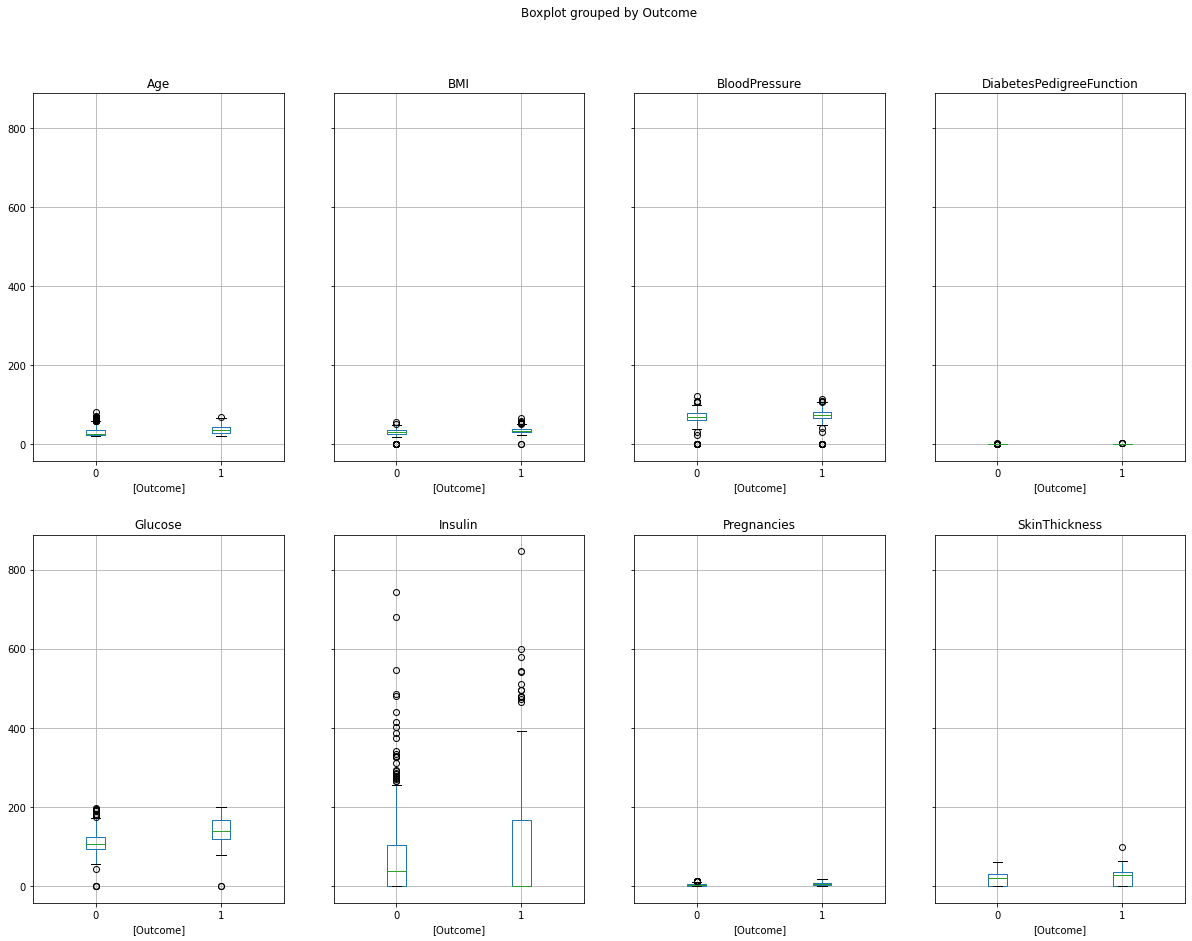

In [127]:
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(20,15), sharey=True)
df.boxplot(by='Outcome', return_type='axes', ax=axes)

# **LOOKING for Correlation**

In [128]:
corr_matrix=df.corr()
print(corr_matrix['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


## **Spliting the data into train and test set using stratified shuffle methos**

In [129]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['Outcome']):
    strat_train_set=df.iloc[train_index]
    strat_test_set=df.iloc[test_index]

print("test set\n",strat_test_set['Outcome'].value_counts()/len(strat_test_set) )
print("train set\n",strat_train_set['Outcome'].value_counts()/len(strat_train_set) )
df['Outcome'].value_counts()/len(df)  

test set
 0    0.649351
1    0.350649
Name: Outcome, dtype: float64
train set
 0    0.651466
1    0.348534
Name: Outcome, dtype: float64


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## **Looking for outliers in trainset**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


Age                              AxesSubplot(0.1,0.559091;0.173913x0.340909)
BMI                         AxesSubplot(0.308696,0.559091;0.173913x0.340909)
BloodPressure               AxesSubplot(0.517391,0.559091;0.173913x0.340909)
DiabetesPedigreeFunction    AxesSubplot(0.726087,0.559091;0.173913x0.340909)
Glucose                              AxesSubplot(0.1,0.15;0.173913x0.340909)
Insulin                         AxesSubplot(0.308696,0.15;0.173913x0.340909)
Pregnancies                     AxesSubplot(0.517391,0.15;0.173913x0.340909)
SkinThickness                   AxesSubplot(0.726087,0.15;0.173913x0.340909)
dtype: object

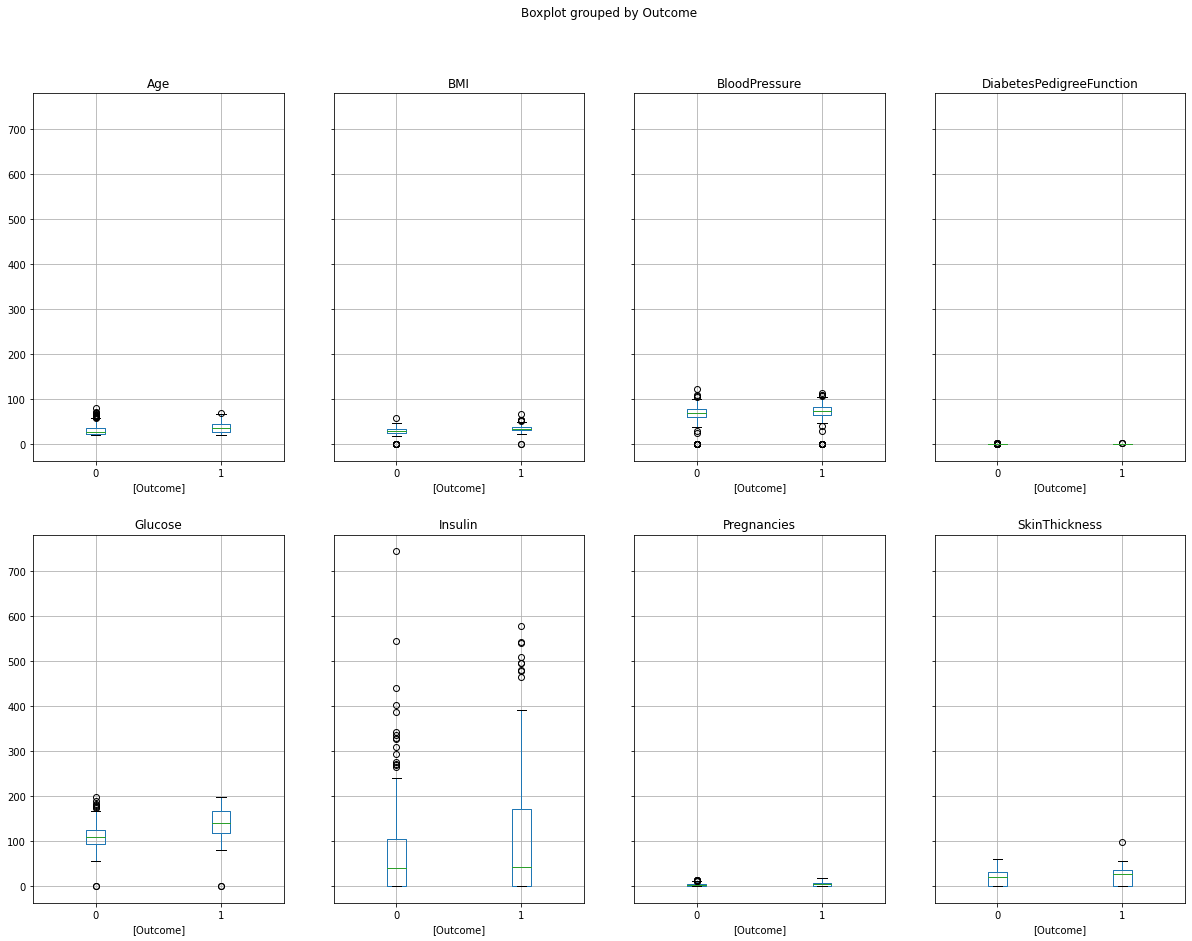

In [130]:
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(20,15), sharey=True)
strat_train_set.boxplot(by='Outcome', return_type='axes', ax=axes)

## **Removing outliers from trainset using interquarantile method**

In [131]:
Q1 = strat_train_set.quantile(0.25)
Q3 = strat_train_set.quantile(0.75)
IQR = Q3[:-1] - Q1[:-1]
#print("IQR",IQR)
new_train = strat_train_set[~((strat_train_set < (Q1[:-1] - 1.5 * IQR)) |(strat_train_set > (Q3[:-1] + 1.5 * IQR))).any(axis=1)]
new_train.shape
Q1[:-1]

Pregnancies                  1.000
Glucose                     99.000
BloodPressure               62.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.500
DiabetesPedigreeFunction     0.245
Age                         24.000
Name: 0.25, dtype: float64

## **Look outliers are much less**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


Age                              AxesSubplot(0.1,0.559091;0.173913x0.340909)
BMI                         AxesSubplot(0.308696,0.559091;0.173913x0.340909)
BloodPressure               AxesSubplot(0.517391,0.559091;0.173913x0.340909)
DiabetesPedigreeFunction    AxesSubplot(0.726087,0.559091;0.173913x0.340909)
Glucose                              AxesSubplot(0.1,0.15;0.173913x0.340909)
Insulin                         AxesSubplot(0.308696,0.15;0.173913x0.340909)
Pregnancies                     AxesSubplot(0.517391,0.15;0.173913x0.340909)
SkinThickness                   AxesSubplot(0.726087,0.15;0.173913x0.340909)
dtype: object

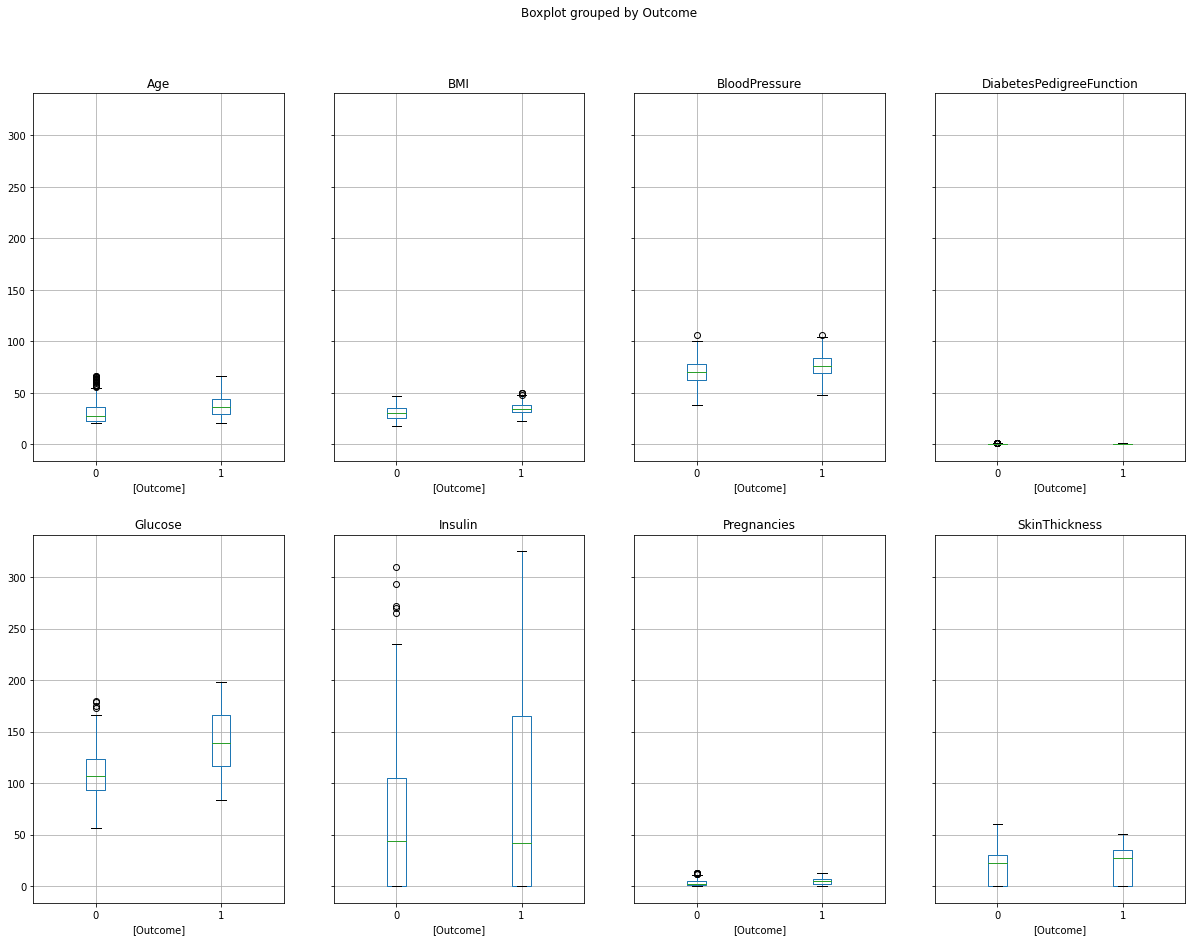

In [132]:
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(20,15), sharey=True)
new_train.boxplot(by='Outcome', return_type='axes', ax=axes)

## **Upsampling the positive class as our data is imbalanced and negative class has more instances**

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# separate minority and majority classes
negative = new_train[new_train.Outcome==0]
positive = new_train[new_train.Outcome==1]
# upsample minority
pos_upsampled = resample(positive,replace=True, # sample with replacement
                         n_samples=len(negative), # match number in majority class
                         random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])

# check new class counts
upsampled.Outcome.value_counts()




1    358
0    358
Name: Outcome, dtype: int64

## Spliting features and label of train set

In [134]:
upsampled.reset_index(inplace=True)
upsampled.drop('index',axis=1,inplace=True)
scaled_features=upsampled.drop("Outcome",axis=1)
labels=upsampled["Outcome"].copy()

In [135]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_features=scaler.fit_transform(features)

new_train
scaled_features


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,90,62,12,43,27.2,0.580,24
1,5,126,78,27,22,29.6,0.439,40
2,2,105,58,40,94,34.9,0.225,25
3,1,146,56,0,0,29.7,0.564,29
4,0,95,64,39,105,44.6,0.366,22
...,...,...,...,...,...,...,...,...
711,0,118,84,47,230,45.8,0.551,31
712,10,111,70,27,0,27.5,0.141,40
713,5,189,64,33,325,31.2,0.583,29
714,13,152,90,33,29,26.8,0.731,43


In [136]:
scaled_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,90,62,12,43,27.2,0.580,24
1,5,126,78,27,22,29.6,0.439,40
2,2,105,58,40,94,34.9,0.225,25
3,1,146,56,0,0,29.7,0.564,29
4,0,95,64,39,105,44.6,0.366,22
...,...,...,...,...,...,...,...,...
711,0,118,84,47,230,45.8,0.551,31
712,10,111,70,27,0,27.5,0.141,40
713,5,189,64,33,325,31.2,0.583,29
714,13,152,90,33,29,26.8,0.731,43


## KNN Classifier 

In [137]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(scaled_features,labels)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Accuracy calculating

In [138]:
from sklearn.metrics import accuracy_score

def accu_score(c,features,label):
      y_pred=c.predict(features)
      accuracy=accuracy_score(label, y_pred)
      print('accuracy:',accuracy)


## **Confusion matrix and precision recall**

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


def con_matrix(c,features,label):
    y_train_pred = cross_val_predict(c,features,label,cv=5)
    print("confusion_matrix\n",confusion_matrix(label, y_train_pred))
    target_names = ['class 0', 'class 1']
    precision=precision_score(label, y_train_pred)
    print('precision',precision)
    recall=recall_score(label, y_train_pred)
    print('recall', recall)
    precisions,recalls,thresholds=precision_recall_curve(label, y_train_pred)
    print('precisions',precisions)
    print('recalls',recalls)
    print('thresholds',thresholds)





In [140]:
accu_score(neigh,scaled_features,labels)
con_matrix(neigh,scaled_features,labels)


accuracy: 0.8519553072625698
confusion_matrix
 [[257 101]
 [ 59 299]]
precision 0.7475
recall 0.835195530726257
precisions [0.5    0.7475 1.    ]
recalls [1.         0.83519553 0.        ]
thresholds [0 1]


## DT classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(scaled_features,labels)
accu_score(clf,scaled_features,labels)
con_matrix(clf,scaled_features,labels)



accuracy: 1.0
confusion_matrix
 [[291  67]
 [ 33 325]]
precision 0.8290816326530612
recall 0.9078212290502793
precisions [0.5        0.82908163 1.        ]
recalls [1.         0.90782123 0.        ]
thresholds [0 1]


## SVM classifier

In [142]:

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

svm=SVC(gamma='auto')
svm.fit(scaled_features,labels)

accu_score(svm,scaled_features,labels)
con_matrix(svm,scaled_features,labels)

accuracy: 1.0
confusion_matrix
 [[358   0]
 [ 68 290]]
precision 1.0
recall 0.8100558659217877
precisions [0.5 1.  1. ]
recalls [1.         0.81005587 0.        ]
thresholds [0 1]


## **Separating features and labels of test set**

In [143]:
strat_test_set.reset_index(inplace=True)
strat_test_set.drop('index',axis=1,inplace=True)
test_features=strat_test_set.drop("Outcome",axis=1)
test_labels=strat_test_set["Outcome"].copy()
strat_test_set

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,159,64,0,0,27.4,0.294,40,0
1,10,68,106,23,49,35.5,0.285,47,0
2,2,122,76,27,200,35.9,0.483,26,0
3,7,114,64,0,0,27.4,0.732,34,1
4,2,74,0,0,0,0.0,0.102,22,0
...,...,...,...,...,...,...,...,...,...
149,3,88,58,11,54,24.8,0.267,22,0
150,2,94,76,18,66,31.6,0.649,23,0
151,2,82,52,22,115,28.5,1.699,25,0
152,4,184,78,39,277,37.0,0.264,31,1


In [144]:
test_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,159,64,0,0,27.4,0.294,40
1,10,68,106,23,49,35.5,0.285,47
2,2,122,76,27,200,35.9,0.483,26
3,7,114,64,0,0,27.4,0.732,34
4,2,74,0,0,0,0.0,0.102,22
...,...,...,...,...,...,...,...,...
149,3,88,58,11,54,24.8,0.267,22
150,2,94,76,18,66,31.6,0.649,23
151,2,82,52,22,115,28.5,1.699,25
152,4,184,78,39,277,37.0,0.264,31


## **Predictions**

In [145]:
print('KNN\n')
accu_score(neigh,test_features,test_labels)
print('Deciion Tree\n')
accu_score(clf,test_features,test_labels)
print('SVM\n')
accu_score(svm,test_features,test_labels)

KNN

accuracy: 0.6168831168831169
Deciion Tree

accuracy: 0.7142857142857143
SVM

accuracy: 0.6493506493506493
